In [8]:
import librosa
import numpy as np
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns

data_file_name = 'simple_28features_30sec'

WORKING_DIR = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
DATA_ROOT_DIR = os.path.join(WORKING_DIR, 'data')
DATA_MUSIC_DIR = os.path.join(DATA_ROOT_DIR, 'genres_original')

In [5]:
data = pd.read_csv(f'{DATA_ROOT_DIR}/{data_file_name}.csv')

In [3]:
print(data.shape)

(1000, 29)


In [4]:
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,tempo,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,classical.00074.wav,0.237426,0.037299,1359.905307,1572.452917,2568.617801,0.072117,161.499023,-289.79858,143.909320,...,-1.684359,3.078970,2.686264,2.535048,4.614130,2.376674,-1.273050,-3.541758,-2.806386,classical
1,classical.00021.wav,0.266760,0.045469,1371.283566,1440.791445,2570.001126,0.079567,135.999178,-278.21188,147.887740,...,-0.964953,-2.221944,-0.574204,1.875123,5.149712,2.630447,0.821938,-1.647068,-0.104045,classical
2,classical.00017.wav,0.256395,0.037378,1358.897903,1417.887433,2417.593714,0.081116,89.102909,-311.53937,148.683270,...,6.745241,4.605570,3.764831,1.275329,1.243601,-0.089599,1.511763,0.387477,-3.003955,classical
3,classical.00036.wav,0.239282,0.016010,1281.770846,1502.895726,2440.360243,0.059410,107.666016,-419.22890,127.448350,...,-5.439006,-9.099890,-10.616878,-5.737675,-0.392486,7.027566,5.593974,-3.469120,-5.166212,classical
4,classical.00097.wav,0.222324,0.036727,1494.115744,1670.924448,2780.841518,0.085921,103.359375,-280.69504,122.728615,...,2.753912,0.057281,1.352473,1.512109,-2.217835,0.780849,-3.965543,-9.139271,-6.930955,classical


## Corrleation heatmap for features


In [11]:
# computing the correlation matrix
spike_cols = ['chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth',
              'rolloff', 'zero_crossing_rate', 'tempo'] + [f' mfcc{i}' for i in range(1, 21)]
corr = data[spike_cols].corr()

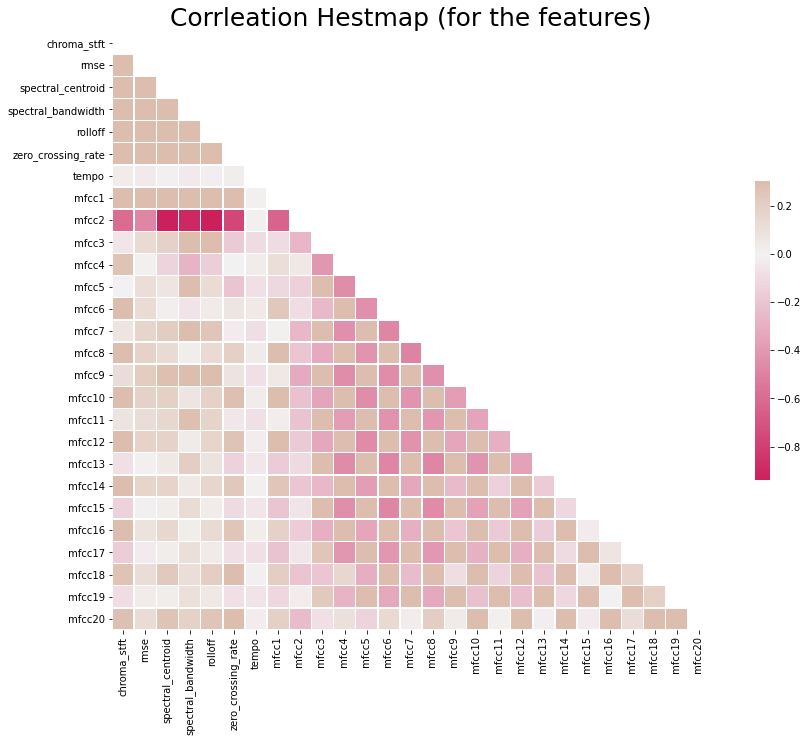

In [14]:
%matplotlib inline
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool_))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s=90, l=45, n=5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Corrleation Hestmap (for the features)', fontsize=25)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.savefig("Corr_heatmap.jpg")
plt.show()

## Box Plot Genres Distributions


Text(0, 0.5, 'BPM')

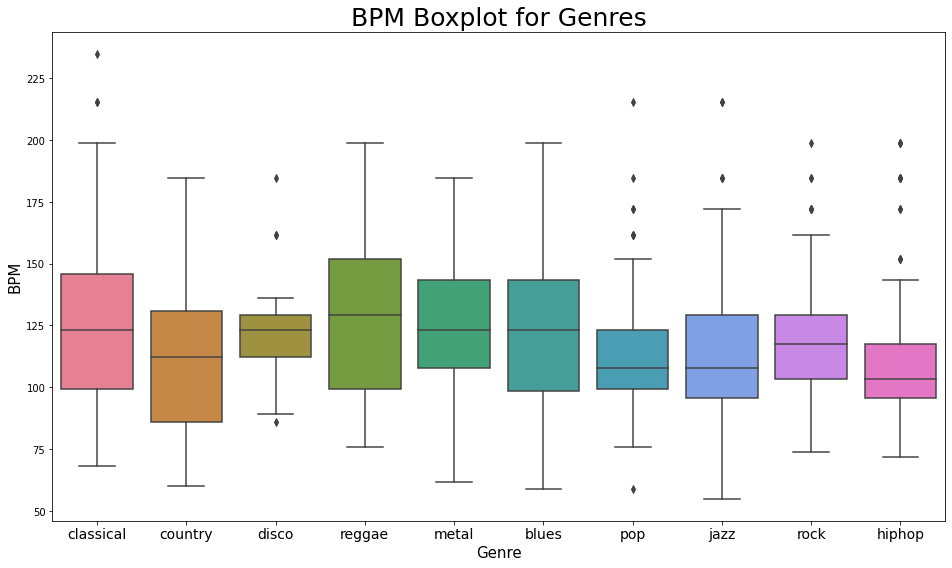

In [15]:
x = data[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9))
sns.boxplot(x="label", y="tempo", data=x, palette='husl')

plt.title('BPM Boxplot for Genres', fontsize=25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.xlabel("Genre", fontsize=15)
plt.ylabel('BPM', fontsize=15)
# plt.savefig("BPM_boxplot.jpg")

## Principal Component Analysis - To visualize groups of genres

  1. Normalization
  2. PCA
  3. The Scatter Plot

In [17]:
from sklearn import preprocessing


data = data.iloc[:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

In [18]:
# Normalize X
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns=cols)

In [19]:
# PCA 2 components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDF = pd.DataFrame(data=principalComponents, columns=['PCA1', 'PCA2'])

# concatenate with target label
finalDF = pd.concat([principalDF, y], axis=1)

pca.explained_variance_ratio_

array([0.31680606, 0.27958021])

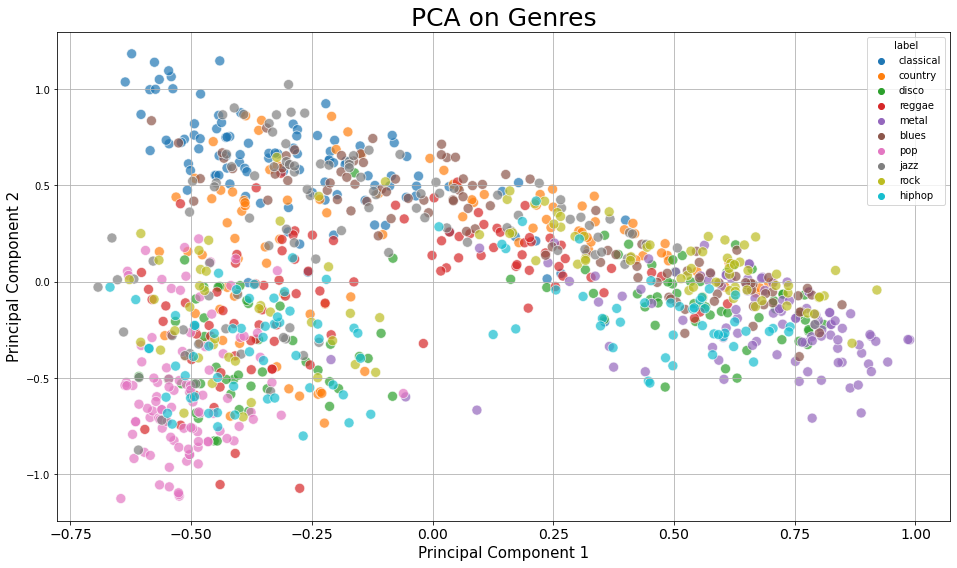

In [21]:
plt.figure(figsize=(16, 9))
sns.scatterplot(x='PCA1', y='PCA2', data=finalDF, hue="label", alpha=0.7, s=100)

plt.title('PCA on Genres', fontsize=25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(fontsize=10)
plt.xlabel("Principal Component 1", fontsize=15)
plt.ylabel("Principal Component 2", fontsize=15)
plt.grid(True)
# plt.savefig("PCA Scatter.jpg")